This is my attempt at kaggle. Please suggest any improvements or suggestions to help me improve.

# Importing Required libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_recall_curve,confusion_matrix
import matplotlib

## Reading dataset and displaying columns

Lets have a look at data

In [ ]:
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')
df.head()

In [ ]:
# let us get inside on various statistical measures on the dataframe
df.info()

**As there 1000 entries at total and each of column has 1000 non-null features we can safely conclude that none of the rows have a null value. We saved ourselves from dealing with null values 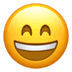

In [ ]:
# seeing what are the unique values under each column
for col in df.columns:
    print(col,df[col].unique(),'\n')

## Visualisations

In [ ]:
sns.countplot(df.gender)

The ratio of female to male students is nearly equal. There is no big difference in the sex ratio of the participants.

In [ ]:
sns.countplot(df['race/ethnicity'])

We can have many people in many people in group C followed by D,B,E,A respectively

In [ ]:
plt.figure(figsize=(31,30))
p = sns.countplot(x="math score", data = df, palette="muted")
_ = plt.setp(p.get_xticklabels(), rotation=90) 

The Math score is roughly normalised in nature

In [ ]:
plt.figure(figsize=(11,8))
p = sns.countplot(x='parental level of education', data = df, palette='dark')

Many of parents have done some college degree or associate degree. This shows majority of students have a good educational background.

In [ ]:
plt.figure(figsize=(30,30))
p = sns.countplot(x="writing score", data = df, palette="pastel")

The teaching in writing skills is good. Cause it is right skewed. This implies there is a good writing instructor in the school.

In [ ]:
df['is_passed_math'] = np.where(df['math score']<50, 'F', 'P')
df['is_passed_reading'] = np.where(df['reading score']<40, 'F', 'P')
df['is_passed_writing'] = np.where(df['writing score']<60, 'F', 'P')

In [ ]:
df['is_passed'] = df.apply(lambda x : 'F' if x['is_passed_math'] == 'F' or 
                                    x['is_passed_reading'] == 'F' or x['is_passed_writing'] == 'F' else 'P', axis =1)

df.is_passed.value_counts()

In [ ]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['total_score'].head()

In [ ]:
sns.swarmplot(df['race/ethnicity'],df['total_score'])

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1, 3, 1)
sns.barplot(x='test preparation course',y='math score',data=df,hue='gender',palette='summer')
plt.title('MATH SCORES')
plt.subplot(1, 3, 2)
sns.barplot(x='test preparation course',y='reading score',data=df,hue='gender',palette='summer')
plt.title('READING SCORES')
plt.subplot(1, 3, 3)
sns.barplot(x='test preparation course',y='writing score',data=df,hue='gender',palette='summer')
plt.title('WRITING SCORES')
plt.show()


*   Girls have higher chance of scoring high in math irrespective of their preparation. (This is racial discrimination by the teachers. They are lenient)
*   Boys perform better than girls in other two categories. (Probably because they parents started hitting them after maths performance or denied them of **ps4**)




In [ ]:
sns.pairplot(data=df,hue='gender',palette='cubehelix')

The marks and gender is linear correlated. Highly correalted.

In [ ]:
fig,ax=plt.subplots()
sns.barplot(x=df['parental level of education'],y='total_score',data=df,palette='Wistia')
fig.autofmt_xdate()

In [ ]:
plt.bar(df['race/ethnicity'].unique(),df['race/ethnicity'].value_counts())
plt.xlabel('Race/Ethnicity Chart')
plt.show()

In [ ]:

plt.title('Test Preparation course Vs Gender',fontsize = 15)
sns.countplot(hue="test preparation course", x="gender", data=df)
plt.show()


In [ ]:

plt.title('Test Preparation course Vs Parental Level Of Education',fontsize = 15)
sns.countplot(hue="test preparation course", y="parental level of education", data=df)


plt.show()

In [ ]:

plt.title('Test Preparation course Vs Lunch',fontsize = 15)
sns.countplot(hue="test preparation course", x="lunch", data=df)
plt.show()



In [ ]:

plt.title('Test Preparation course Vs Ethnicity',fontsize = 15)
sns.countplot(hue="test preparation course", y="race/ethnicity", data=df)
plt.show()

In [ ]:
df['percentage']=df['total_score']/300*100

In [ ]:
#Assigning the grades

def determine_grade(scores):
    if scores >= 85 and scores <= 100:
        return 'Grade A'
    elif scores >= 70 and scores < 85:
        return 'Grade B'
    elif scores >= 55 and scores < 70:
        return 'Grade C'
    elif scores >= 35 and scores < 55:
        return 'Grade D'
    elif scores >= 0 and scores < 35:
        return 'Grade E'
    
df['grades']=df['percentage'].apply(determine_grade)

In [ ]:
plt.figure(figsize=(13,12))
df['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

An upvote would mean a lot. Especially for the first kernel. ( Thanks for reviewing my notebook)